# Differentiation

Let's go from simple to complex. 

Consider a function $ y = f(x) $ and we want to find its derivative
-   let $ f : \mathbb{R} \rightarrow \mathbb{R} $, everyone knows what to do
-   let $ f : \mathbb{R}^n \rightarrow \mathbb{R} $
    
    now x is a vector $ [x_1, x_2, \dots x_n] $. The gradient is defined as a vector of partial direvatives
    $$ \frac{df}{dx} = [\frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \dots, \frac{\partial f}{\partial x_n} ] $$

    ***Note***: there are different conventions on what shape the gradient will have (column or row), choose whatever easier for you, but keep in mind other people may prefer different convention.
    
    
-   let $ \mathbf{f} : \mathbb{R}^n \rightarrow \mathbb{R}^m $
    
    now $x$ is a vector $ [x_1, x_2, \dots x_n] $ *and* $y$ is a vector $ [y_1, y_2, \dots y_n] $. The derivative is expressed by the jacobian *matrix*. 
    
$$
    \frac{d\mathbf f}{d\mathbf x} = \begin{bmatrix}
    \dfrac{\partial \mathbf{f}}{\partial x_1} & \cdots & \dfrac{\partial \mathbf{f}}{\partial x_n} \end{bmatrix}
= \begin{bmatrix}
    \dfrac{\partial f_1}{\partial x_1} & \cdots & \dfrac{\partial f_1}{\partial x_n}\\
    \vdots & \ddots & \vdots\\
    \dfrac{\partial f_m}{\partial x_1} & \cdots & \dfrac{\partial f_m}{\partial x_n} \end{bmatrix}
$$

-   let $ \mathbf{f} : \mathbb{R}^{n  \times k}  \rightarrow \mathbb{R}^{ m \times p} $
    
    think of $x$ as of vector with $nk$ elements, $y$ as of vector with $mp$ elements, it is previous case now.

# Chain rule

Let $$ L(x) = g(f(x)) $$

We aim to find $\nabla_x L$. Obvious, if $f,g: \mathbb{R} \rightarrow \mathbb{R}$ using rule:  

$$ \frac{dL}{dx} = \frac{dg}{df}\frac{df}{dx}$$

and practical formula:

$$ \left.\frac{dL}{dx}\right|_{x=x_0} = \left.\frac{dg}{df}\right|_{u = f(x_0)} \cdot \left.\frac{df}{dx}\right|_{x=x_0} $$

What's up with multidimensional case ? Barely the same. It is the sum of 1-dimentional chains.
$$
\frac{\partial L}{\partial x_i} = \sum_{j = 1}^m \frac{\partial g}{\partial f_j} \frac{\partial f_j}{\partial x_i}.
$$

### Seminar practice

#### ex.1 (dot product)

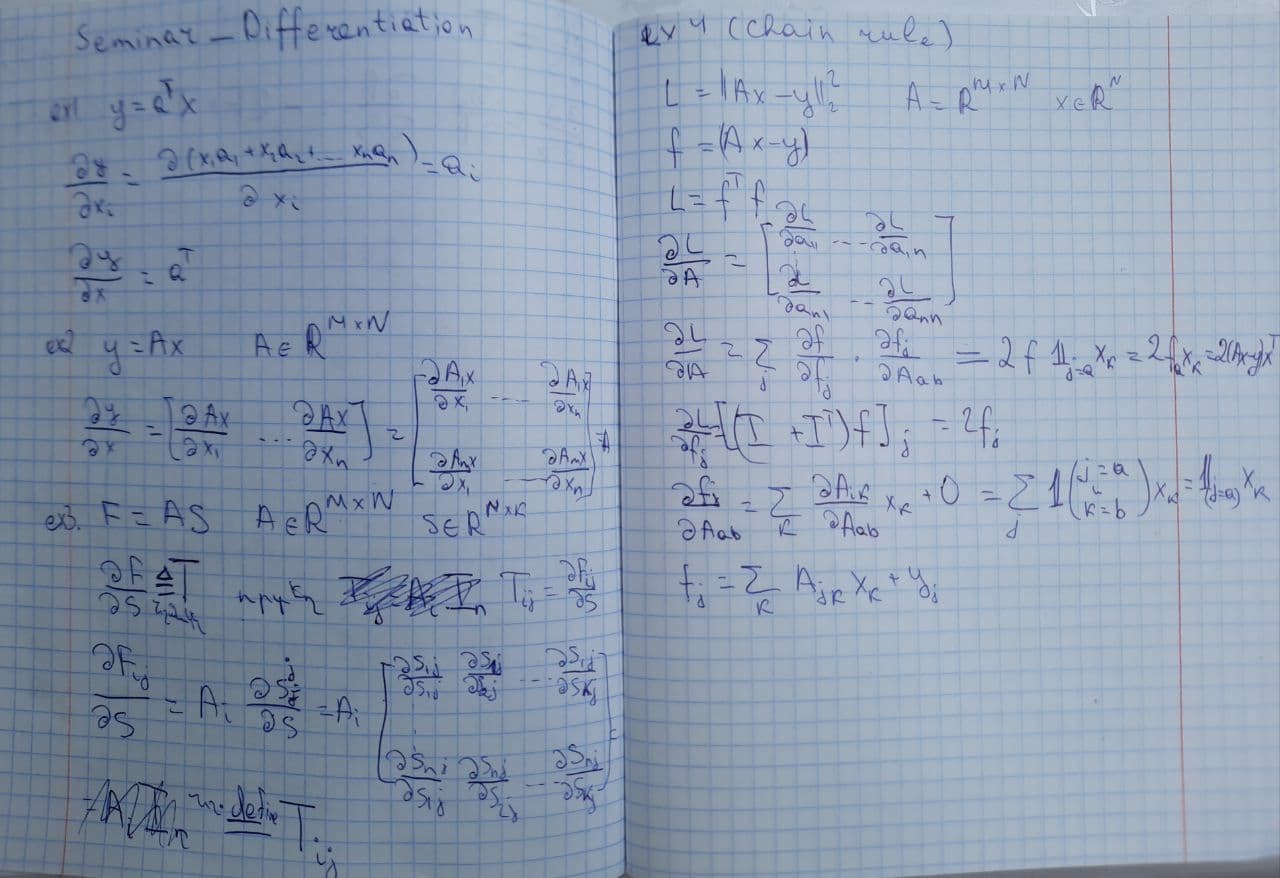

$$  
y = a^Tx\\
\frac{\partial y}{\partial x_i} = \frac{\partial (x_1*a_1 + x_2*a_2 + ...+ x_n*a_n)}{\partial x_i} \\
\ = a_i \\
\frac{dy}{dx} =  a^T
$$ 

#### ex.2 (Matrix-vector multiplication)

$$  
y = Ax , \quad A \in \mathbb{R}^{M \times N} \\
\frac{dy}{dx} = \begin{bmatrix}
    \dfrac{\partial \mathbf{Ax}}{\partial x_1} & \cdots & \dfrac{\partial \mathbf{Ax}}{\partial x_n} \end{bmatrix}  =
\begin{bmatrix}
    \dfrac{\partial A_1*x}{\partial x_1} & \cdots & \dfrac{\partial A_1*x}{\partial x_n}\\
    \vdots & \ddots & \vdots\\
    \dfrac{\partial A_m*x}{\partial x_1} & \cdots & \dfrac{\partial A_m*x}{\partial x_n} \end{bmatrix} = A
$$ 


#### ex.3 (Matrix-Matrix multiplication)

$$  
F = AS , \quad A \in \mathbb{R}^{M \times N}, S \in \mathbb{R}^{N \times K} \\
$$

The result should be of shape $\frac{dF}{dS} \in \mathbb{R}^{MK \times NK}$ and let us vectorize column by column.

When $K = 1$ it fallbacks to the previous example. Let's try $K = 2$ to build an intuition.

Notice, that first column in $F$ does not depend on second column in $S$, and second column in $F$ does not depend on first column in $S$. And we already know what dependence (in terms of gradient) is between corresponding columns. Thus the answer is block-diagonal matrix:

$$
\frac{dF}{dS} = ?
$$ 

#### ex. 4 (Chain rule)

In this example you can recognize a model! It is simple linear regression with multiple objectives. 
$$  L = || Ax - y ||_2^2 , \quad A \in \mathbb{R}^{M \times N}, x \in \mathbb{R}^{N}  $$ 
Let $f = Ax$. Find $\frac{dL}{dA}$ using chain rule. 

- Note, that
$$
|| Ax - y ||_2^2 = \sum_{i=1}^{M} (A_{i,:}x - y_i)^2 
$$ 
so you can easily find the gradient with respect to each row (the gradient w.r.t. vector is easier, isn't it?) and then stack these gradients to obtain gradient w.r.t. matrix $A$. **But we will go the hard way** and do it straightforward using chain rule. Let $f = Ax$ 

$$
L = || f - y ||_2^2 = (f-y)^T(f-y) = f^Tf - 2f^Ty + y^Ty \\
\frac{dL}{df} = 2f^T -2y^T
$$

- Now hint, look at *ex.3* last result (block-diag matrix), what if we multiply something by this matrix ? In fact, suppose we vectorized a given matrix $B$ into vector $B_{vec}$ of size $N^2$ and we multiply a block-diagonal matrix of size $N^2 \times N^2$ with $C$ on diagonal by $B_{vec}$. The resulting vector $D_{vec}$ has $N^2$ elements but if reshaped is exactly $D = CB^T$. This can look idiosyncratic for the first time but it is easy.

- So what we should learn from the example above? That $\frac{df}{dA}$ is something block-diagonal-like with $x$ on diagonal and the resulting $\frac{dL}{dA}$ is just a multiplication of $\frac{dL}{df}$ and $x$ (transpose something to get correct dimentions). Finally, 

$$
\frac{df}{dA} = 2f x^T
$$


